In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("/home/yance/capscrot/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
765,4718-DHSMV,Female,0,No,No,11,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,35.80,363.15,No
3996,1395-WSWXR,Male,0,No,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.75,487.05,No
688,0946-FKYTX,Male,0,No,No,52,No,No phone service,DSL,No,...,No,No,No,No,One year,No,Mailed check,30.10,1623.4,No
3504,3678-MNGZX,Male,0,Yes,Yes,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.7,No
5807,8464-EETCQ,Male,0,No,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.80,1094.35,No


In [3]:
df.drop('customerID', axis='columns', inplace= True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
df.iloc[488]['TotalCharges']

' '

In [7]:
df1 = df[df.TotalCharges!=' ']
df.shape

(7043, 20)

In [8]:
pd.to_numeric(df.TotalCharges, errors=  'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df1.TotalCharges =pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_16535/1720090683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges =pd.to_numeric(df1.TotalCharges)


In [10]:
df1.TotalCharges.dtypes

dtype('float64')

In [11]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


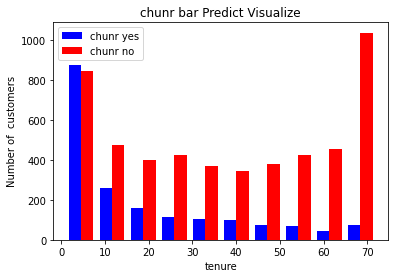

In [12]:
chunr_no_tenure = df1[df1.Churn=='No'].tenure
chunr_Yes_tenure = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of  customers")
plt.hist([chunr_Yes_tenure,chunr_no_tenure],color=['blue','red'],label = ["chunr yes","chunr no"])
plt.title('chunr bar Predict Visualize')
plt.legend()

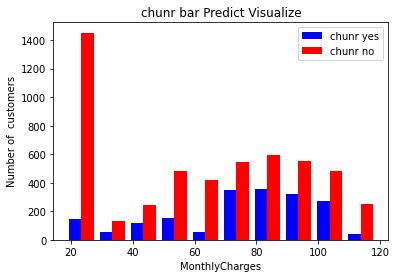

In [13]:
chunr_no_tenure = df1[df1.Churn=='No'].MonthlyCharges
chunr_Yes_tenure = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of  customers")
plt.hist([chunr_Yes_tenure,chunr_no_tenure],color=['blue','red'],label = ["chunr yes","chunr no"])
plt.title('chunr bar Predict Visualize')
plt.legend()

In [14]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtypes == 'object': 
            print(f'{column}:{df1[column].unique()}')

In [15]:
print_unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
df1.replace('No phone service','No', inplace= True)
df1.replace('No internet service','No',inplace= True)

/tmp/ipykernel_16535/2697666734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace= True)
/tmp/ipykernel_16535/2697666734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace= True)


In [17]:
print_unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [18]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_cols:
    df1[col].replace({'Yes':1,'No':0},inplace=True)
    df1['gender'].replace({'Female':1,'Male':0},inplace=True)

for column in df1:
    print(f'{column}:{df1[column].unique()}')

/tmp/ipykernel_16535/2869217278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipykernel_16535/2869217278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [19]:
df2 = pd.get_dummies(data=df1,columns=['PaymentMethod','Contract','InternetService'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
4198,1,0,1,1,52,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1920,0,0,1,0,22,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
6829,0,0,1,1,8,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3514,0,0,1,1,60,1,1,1,0,1,...,0,0,1,0,0,0,1,0,1,0
2140,1,0,1,1,33,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [20]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check 

In [21]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
#from tensorflow
#df2['tenure','MonthlyCharges','TotalCharges'] = tf.keras.utils.normalize(df2, axis=-1, order=2)



In [22]:
for column in df2:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [23]:
x  = df2.drop("Churn",axis = 'columns')
y = df2["Churn"]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [25]:
x_train.shape

(5625, 26)

In [26]:
x_test.shape

(1407, 26)

In [27]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [28]:
len(x_train.columns)

26

In [29]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

2022-06-13 22:52:04.866706: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 22:52:04.866754: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-13 22:52:36.411989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-13 22:52:36.412055: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-13 22:52:36.412094: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yance-pc): /proc/driver/nvidia/version does not exist
2022-06-13 22:52:36.429367: I tensorflow/core/platform/cpu_feature_g

Epoch 1/100
176/176 [==============================] - 4s 2ms/step - loss: 0.5059 - accuracy: 0.7575
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8018
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4071 - accura

In [30]:
model.evaluate(x_train,y_train)

176/176 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8375


[0.3412838578224182, 0.8375111222267151]

In [31]:
yp = model.predict(x_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.06242573],
       [0.48737958],
       [0.00182046],
       [0.67600477],
       [0.69633645]], dtype=float32)

In [32]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [33]:
ypred = []
for el in yp:
    if el > 0.5:
        ypred.append(1)
    else:
        ypred.append(0)

ypred[:5]

[0, 0, 0, 1, 1]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.64      0.50      0.57       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

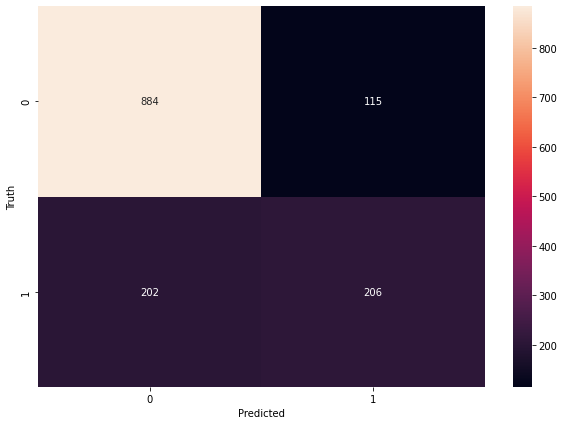

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=ypred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
# accuracy
round((877+212)/(877+212+196+122),2)

0.77

Precision for 0 class. i.e. Precision for customers who did not churn

In [37]:
round(877/(877+196),2)

0.82

Precision for 1 class. i.e. Precision for customers who actually chur

In [38]:
round(212/(212+196),2)

0.52

Recall for 0 class

In [39]:
round(877/(877+122),2)

0.88

In [40]:
round(212/(212+122),2)

0.63